# Imports

In [79]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import sys
sys.path.append('../')


from utils import *
from mesax import meSAX
from metrics import rmsre

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [80]:
df = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
df = df['Close'][:2500].values.squeeze()
df

[*********************100%***********************]  1 of 1 completed


array([ 6.44741011,  6.45855856,  6.35582685, ..., 63.43808746,
       64.36878967, 65.61215973])

In [81]:
df.shape

(2500,)

# Sax method

In [86]:
sax = meSAX(K=6, windows_size=50, step_size=5, reconstruction_method="slope")
sax.synthesize(df)
reconstructed_data = sax.reconstruct()

500it [00:00, 35854.88it/s]


In [90]:
sax.get_compression_ratio()

2.218

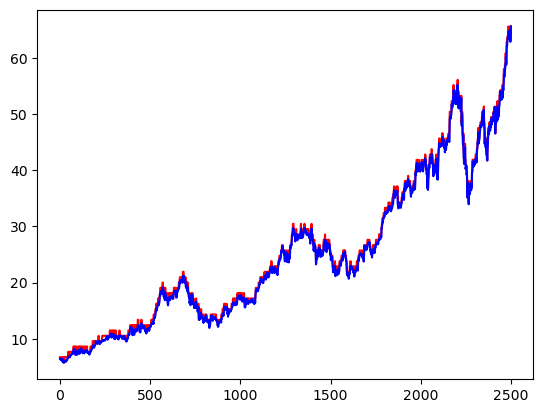

In [88]:
plt.plot(reconstructed_data, color='red')
plt.plot(df[:len(reconstructed_data)], color='blue')

In [92]:
loss_slope = []
loss_mesax = []

for k in range(3, 15):
    sax = meSAX(K=k, windows_size=50, step_size=5, reconstruction_method="slope")
    sax.synthesize(df)
    reconstructed_data = sax.reconstruct()
    loss_slope.append(rmsre(df, reconstructed_data))
    
    sax = meSAX(K=k, windows_size=50, step_size=5, reconstruction_method="normal")
    sax.synthesize(df)
    reconstructed_data = sax.reconstruct()
    loss_mesax.append(rmsre(df, reconstructed_data))

500it [00:00, 33661.07it/s]
500it [00:00, 66818.07it/s]
500it [00:00, 45163.17it/s]
500it [00:00, 53624.63it/s]
500it [00:00, 19935.47it/s]
500it [00:00, 27901.76it/s]
500it [00:00, 58207.33it/s]
500it [00:00, 31047.76it/s]
500it [00:00, 56935.22it/s]
500it [00:00, 16946.82it/s]
500it [00:00, 57180.50it/s]
500it [00:00, 12567.20it/s]
500it [00:00, 62206.03it/s]
500it [00:00, 11845.24it/s]
500it [00:00, 60024.96it/s]
500it [00:00, 11468.93it/s]
500it [00:00, 63373.38it/s]
500it [00:00, 11156.19it/s]
500it [00:00, 61789.98it/s]
500it [00:00, 12318.36it/s]
500it [00:00, 61537.96it/s]
500it [00:00, 11621.40it/s]
500it [00:00, 63972.67it/s]
500it [00:00, 11797.20it/s]


In [ ]:
plt.plot(range(3, 15), loss_slope, label='slope')
plt.plot(range(3, 15), loss_mesax, label='mesax')
plt.legend()
plt.show()